Decision Tree Accuracy: 0.9444
XGBoost Accuracy: 0.9444


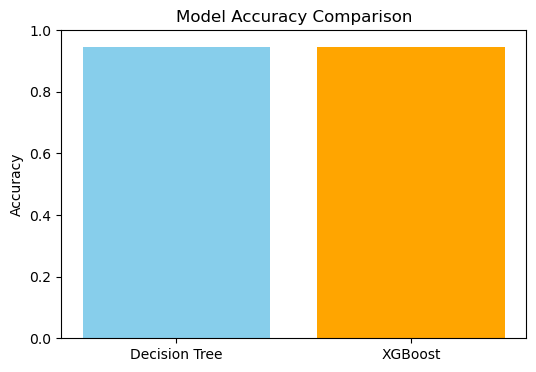

In [1]:
# 라이브러리 및 데이터 불러오기
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분할
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DT 모델 학습
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# XGB 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# 정확도 출력
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# 성능 비교 시각화
plt.figure(figsize=(6,4))
plt.bar(['Decision Tree', 'XGBoost'], [dt_accuracy, xgb_accuracy], color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()
